In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path= r'C:\Users\sssss\Aug-2024 Instacart Basket Analysis'

In [4]:
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [5]:
df_merged

order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2539329        1    prior             1          2   
2         2539329        1    prior             1          2   
3         2539329        1    prior             1          2   
4         2539329        1    prior             1          2   
...           ...      ...      ...           ...        ...   
5152528   3114261    32765    prior            29          3   
5152529   3114261    32765    prior            29          3   
5152530   3114261    32765    prior            29          3   
5152531   3114261    32765    prior            29          3   
5152532   3114261    32765    prior            29          3   

         order_hour_of_day  days_since_prior_order  product_id  \
0                        8                     NaN         196   
1                        8                     NaN       14084   
2                        8                     NaN       12427   
3                        8                     NaN       26088   
4                        8                     NaN       26405   
...                    ...                     ...         ...   
5152528                 18                     3.0       26201   
5152529                 18                     3.0        7854   
5152530                 18                     3.0       31343   
5152531                 18                     3.0       23001   
5152532                 18                     3.0       18761   

         add_to_cart_order  reordered  ...     Frequency_flag  First Name  \
0                        1          0  ...  Frequent customer       Linda   
1                        2          0  ...       High Spender       Linda   
2                        3          0  ...  Frequent customer       Linda   
3                        4          0  ...  Frequent customer       Linda   
4                        5          0  ...  Frequent customer       Linda   
...                    ...        ...  ...                ...         ...   
5152528                  4          0  ...       High Spender      Justin   
5152529                  5          0  ...  Frequent customer      Justin   
5152530                  6          1  ...       High Spender      Justin   
5152531                  7          1  ...  Frequent customer      Justin   
5152532                  8          1  ...  Frequent customer      Justin   

          Surname  Gender    STATE Age date_joined n_dependants fam_status  \
0          Nguyen  Female  Alabama  31   2/17/2019            3    married   
1          Nguyen  Female  Alabama  31   2/17/2019            3    married   
2          Nguyen  Female  Alabama  31   2/17/2019            3    married   
3          Nguyen  Female  Alabama  31   2/17/2019            3    married   
4          Nguyen  Female  Alabama  31   2/17/2019            3    married   
...           ...     ...      ...  ..         ...          ...        ...   
5152528  Jacobson    Male   Nevada  53  10/13/2017            3    married   
5152529  Jacobson    Male   Nevada  53  10/13/2017            3    married   
5152530  Jacobson    Male   Nevada  53  10/13/2017            3    married   
5152531  Jacobson    Male   Nevada  53  10/13/2017            3    married   
5152532  Jacobson    Male   Nevada  53  10/13/2017            3    married   

         income  
0         40423  
1         40423  
2         40423  
3         40423  
4         40423  
...         ...  
5152528  135419  
5152529  135419  
5152530  135419  
5152531  135419  
5152532  135419  

[5152533 rows x 35 columns]

###The sensitive information in our dataframe is first and last name, gender, state, age and marital status. Before proceeding with the analysis, client should be consulted as it can pose security implications. The data can be masked or anonymized. 

In [7]:
#For loop function 
region = []

for value in df_merged["STATE"]:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append("Northeast")
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append("Midwest")
    elif value in ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']:
        region.append("West")
    else:
        region.append("South")

In [8]:
#Defining a new column
df_merged['Region']= region

In [9]:
df_merged.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'Unnamed: 0',
       'product_name', 'aisle_id', 'prices', 'source', 'price_range_loc',
       'Busiest day', 'Day Analysis', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price_per_userid', 'type_of_spender',
       'median_days_prior', 'Frequency_flag', 'First Name', 'Surname',
       'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'Region'],
      dtype='object')

In [10]:
#Using the Frequency/count functionE
df_merged['Region'].value_counts(dropna = False)

Region
South        1723299
West         1301162
Midwest      1203753
Northeast     924319
Name: count, dtype: int64

In [11]:
#Using the Frequency/count function
df_region_counts=df_merged[['Region', 'type_of_spender']].value_counts(dropna=False)

In [12]:
df_region_counts = df_region_counts.reset_index()

In [13]:
df_region_counts.index.name = 'count'

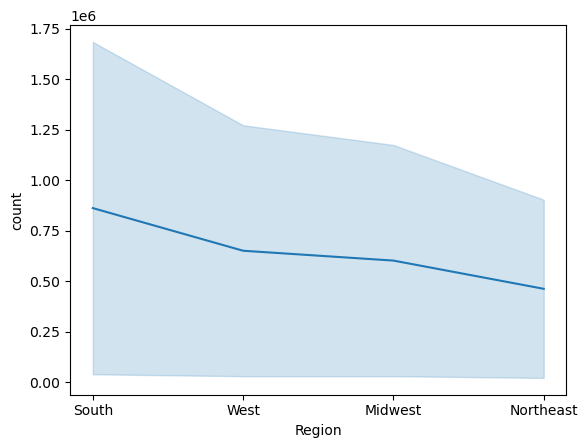

In [14]:
line = sns.lineplot(data = df_region_counts, x = 'Region',y = 'count')

### As per the line chart we can see the region wise spending habits of the population. The sales being highest in the South region and drasticaly declined as we move the graph to the right to the Northeast region.

In [16]:
df_merged

order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2539329        1    prior             1          2   
2         2539329        1    prior             1          2   
3         2539329        1    prior             1          2   
4         2539329        1    prior             1          2   
...           ...      ...      ...           ...        ...   
5152528   3114261    32765    prior            29          3   
5152529   3114261    32765    prior            29          3   
5152530   3114261    32765    prior            29          3   
5152531   3114261    32765    prior            29          3   
5152532   3114261    32765    prior            29          3   

         order_hour_of_day  days_since_prior_order  product_id  \
0                        8                     NaN         196   
1                        8                     NaN       14084   
2                        8                     NaN       12427   
3                        8                     NaN       26088   
4                        8                     NaN       26405   
...                    ...                     ...         ...   
5152528                 18                     3.0       26201   
5152529                 18                     3.0        7854   
5152530                 18                     3.0       31343   
5152531                 18                     3.0       23001   
5152532                 18                     3.0       18761   

         add_to_cart_order  reordered  ... First Name   Surname  Gender  \
0                        1          0  ...      Linda    Nguyen  Female   
1                        2          0  ...      Linda    Nguyen  Female   
2                        3          0  ...      Linda    Nguyen  Female   
3                        4          0  ...      Linda    Nguyen  Female   
4                        5          0  ...      Linda    Nguyen  Female   
...                    ...        ...  ...        ...       ...     ...   
5152528                  4          0  ...     Justin  Jacobson    Male   
5152529                  5          0  ...     Justin  Jacobson    Male   
5152530                  6          1  ...     Justin  Jacobson    Male   
5152531                  7          1  ...     Justin  Jacobson    Male   
5152532                  8          1  ...     Justin  Jacobson    Male   

           STATE  Age date_joined n_dependants fam_status  income Region  
0        Alabama   31   2/17/2019            3    married   40423  South  
1        Alabama   31   2/17/2019            3    married   40423  South  
2        Alabama   31   2/17/2019            3    married   40423  South  
3        Alabama   31   2/17/2019            3    married   40423  South  
4        Alabama   31   2/17/2019            3    married   40423  South  
...          ...  ...         ...          ...        ...     ...    ...  
5152528   Nevada   53  10/13/2017            3    married  135419   West  
5152529   Nevada   53  10/13/2017            3    married  135419   West  
5152530   Nevada   53  10/13/2017            3    married  135419   West  
5152531   Nevada   53  10/13/2017            3    married  135419   West  
5152532   Nevada   53  10/13/2017            3    married  135419   West  

[5152533 rows x 36 columns]

In [17]:
#Using group by with the aggregation function
df_merged['Activity']=df_merged.groupby('user_id').agg({'order_id': ['count']})

In [18]:
def Activity (row):
    if row['Activity'] < 5 :
        return 'low Activity customer'
    else:
        return 'High Activity customer'

df_merged['Activity'] = df_merged.apply(Activity, axis=1)

In [19]:
#Using the Frequency/count function
df_merged['Activity'].value_counts(dropna=False)

Activity
High Activity customer    5152407
low Activity customer         126
Name: count, dtype: int64

In [20]:
df_merged

order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2539329        1    prior             1          2   
2         2539329        1    prior             1          2   
3         2539329        1    prior             1          2   
4         2539329        1    prior             1          2   
...           ...      ...      ...           ...        ...   
5152528   3114261    32765    prior            29          3   
5152529   3114261    32765    prior            29          3   
5152530   3114261    32765    prior            29          3   
5152531   3114261    32765    prior            29          3   
5152532   3114261    32765    prior            29          3   

         order_hour_of_day  days_since_prior_order  product_id  \
0                        8                     NaN         196   
1                        8                     NaN       14084   
2                        8                     NaN       12427   
3                        8                     NaN       26088   
4                        8                     NaN       26405   
...                    ...                     ...         ...   
5152528                 18                     3.0       26201   
5152529                 18                     3.0        7854   
5152530                 18                     3.0       31343   
5152531                 18                     3.0       23001   
5152532                 18                     3.0       18761   

         add_to_cart_order  reordered  ...   Surname  Gender    STATE  Age  \
0                        1          0  ...    Nguyen  Female  Alabama   31   
1                        2          0  ...    Nguyen  Female  Alabama   31   
2                        3          0  ...    Nguyen  Female  Alabama   31   
3                        4          0  ...    Nguyen  Female  Alabama   31   
4                        5          0  ...    Nguyen  Female  Alabama   31   
...                    ...        ...  ...       ...     ...      ...  ...   
5152528                  4          0  ...  Jacobson    Male   Nevada   53   
5152529                  5          0  ...  Jacobson    Male   Nevada   53   
5152530                  6          1  ...  Jacobson    Male   Nevada   53   
5152531                  7          1  ...  Jacobson    Male   Nevada   53   
5152532                  8          1  ...  Jacobson    Male   Nevada   53   

         date_joined n_dependants fam_status  income Region  \
0          2/17/2019            3    married   40423  South   
1          2/17/2019            3    married   40423  South   
2          2/17/2019            3    married   40423  South   
3          2/17/2019            3    married   40423  South   
4          2/17/2019            3    married   40423  South   
...              ...          ...        ...     ...    ...   
5152528   10/13/2017            3    married  135419   West   
5152529   10/13/2017            3    married  135419   West   
5152530   10/13/2017            3    married  135419   West   
5152531   10/13/2017            3    married  135419   West   
5152532   10/13/2017            3    married  135419   West   

                       Activity  
0        High Activity customer  
1        High Activity customer  
2        High Activity customer  
3        High Activity customer  
4        High Activity customer  
...                         ...  
5152528  High Activity customer  
5152529  High Activity customer  
5152530  High Activity customer  
5152531  High Activity customer  
5152532  High Activity customer  

[5152533 rows x 37 columns]

In [21]:
df_filtered = df_merged[df_merged['Activity'] != 'low activity customer']

In [22]:
df_filtered

order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2539329        1    prior             1          2   
2         2539329        1    prior             1          2   
3         2539329        1    prior             1          2   
4         2539329        1    prior             1          2   
...           ...      ...      ...           ...        ...   
5152528   3114261    32765    prior            29          3   
5152529   3114261    32765    prior            29          3   
5152530   3114261    32765    prior            29          3   
5152531   3114261    32765    prior            29          3   
5152532   3114261    32765    prior            29          3   

         order_hour_of_day  days_since_prior_order  product_id  \
0                        8                     NaN         196   
1                        8                     NaN       14084   
2                        8                     NaN       12427   
3                        8                     NaN       26088   
4                        8                     NaN       26405   
...                    ...                     ...         ...   
5152528                 18                     3.0       26201   
5152529                 18                     3.0        7854   
5152530                 18                     3.0       31343   
5152531                 18                     3.0       23001   
5152532                 18                     3.0       18761   

         add_to_cart_order  reordered  ...   Surname  Gender    STATE  Age  \
0                        1          0  ...    Nguyen  Female  Alabama   31   
1                        2          0  ...    Nguyen  Female  Alabama   31   
2                        3          0  ...    Nguyen  Female  Alabama   31   
3                        4          0  ...    Nguyen  Female  Alabama   31   
4                        5          0  ...    Nguyen  Female  Alabama   31   
...                    ...        ...  ...       ...     ...      ...  ...   
5152528                  4          0  ...  Jacobson    Male   Nevada   53   
5152529                  5          0  ...  Jacobson    Male   Nevada   53   
5152530                  6          1  ...  Jacobson    Male   Nevada   53   
5152531                  7          1  ...  Jacobson    Male   Nevada   53   
5152532                  8          1  ...  Jacobson    Male   Nevada   53   

         date_joined n_dependants fam_status  income Region  \
0          2/17/2019            3    married   40423  South   
1          2/17/2019            3    married   40423  South   
2          2/17/2019            3    married   40423  South   
3          2/17/2019            3    married   40423  South   
4          2/17/2019            3    married   40423  South   
...              ...          ...        ...     ...    ...   
5152528   10/13/2017            3    married  135419   West   
5152529   10/13/2017            3    married  135419   West   
5152530   10/13/2017            3    married  135419   West   
5152531   10/13/2017            3    married  135419   West   
5152532   10/13/2017            3    married  135419   West   

                       Activity  
0        High Activity customer  
1        High Activity customer  
2        High Activity customer  
3        High Activity customer  
4        High Activity customer  
...                         ...  
5152528  High Activity customer  
5152529  High Activity customer  
5152530  High Activity customer  
5152531  High Activity customer  
5152532  High Activity customer  

[5152533 rows x 37 columns]

## Age profiling

In [24]:
df_filtered['Age'].describe()

count    5.152533e+06
mean     4.934864e+01
std      1.853407e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [25]:
# Export data to pkl
df_filtered.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'High_activity_Cust.pkl'))

In [26]:
# creating 'Young Adult' age group
df_filtered.loc[df_filtered['Age']<=25,'age_group']='Young Adult'

In [27]:
# creating 'Middle-Age Adult' age group
df_filtered.loc[(df_filtered['Age']>=45) & (df_filtered['Age']<=64),'age_group']='Middle-Age Adult'

In [28]:
# creating 'Senior' age group
df_filtered.loc[df_filtered['Age']>=65,'age_group']='Senior'

In [29]:
# creating 'Adult' age group
df_filtered.loc[(df_filtered['Age']>=26) & (df_filtered['Age']<=44),'age_group']='Adult'

In [30]:
df_filtered['age_group'].value_counts()

age_group
Middle-Age Adult    1612705
Adult               1525416
Senior              1355904
Young Adult          658508
Name: count, dtype: int64

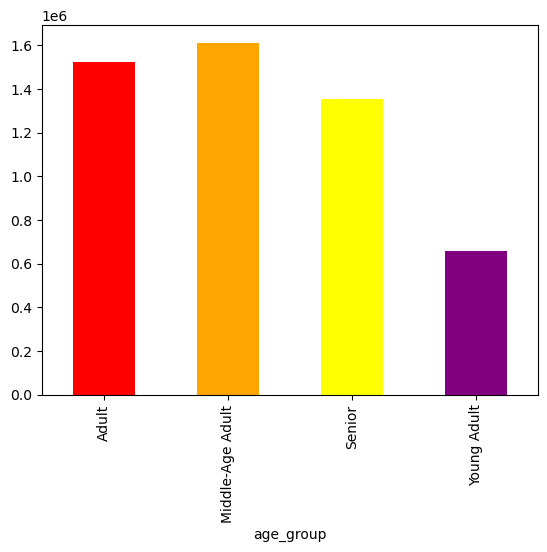

In [31]:
# Creating plot Chart of Age Groups
bar = df_filtered['age_group'].value_counts().sort_index().plot.bar(color = ['red','orange', 'yellow', 'purple'])


## Profiling based on Income

In [33]:
df_filtered['income'].describe()

count    5.152533e+06
mean     9.875606e+04
std      4.345807e+04
min      2.598600e+04
25%      6.613600e+04
50%      9.603100e+04
75%      1.267140e+05
max      5.768760e+05
Name: income, dtype: float64

In [34]:
#For loop function 
income_class = []

for value in df_filtered["income"]:
    if value < 65000:
        income_class.append("low income")
    elif value > 65000 and value < 130000:
        income_class.append("mid income")
    else:
        income_class.append("High income")

In [35]:
#Defining a new column
df_filtered['Income_Flag']= income_class

In [36]:
df_filtered['Income_Flag'].value_counts()

Income_Flag
mid income     2719407
low income     1242586
High income    1190540
Name: count, dtype: int64

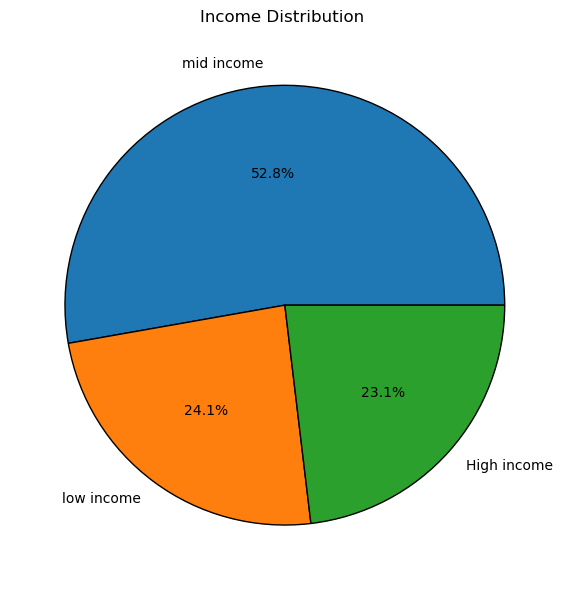

In [37]:
#creating a pie chart of Income group
income_group_counts = df_filtered['Income_Flag'].value_counts()
plt.figure(figsize=(6,6))
income_group_pie_chart=income_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Income Distribution ')
plt.ylabel('')
plt.tight_layout()
plt.show()

#### Profiling based on Number of Dependents

In [39]:
df_filtered.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2539329        1    prior             1          2                  8   
2   2539329        1    prior             1          2                  8   
3   2539329        1    prior             1          2                  8   
4   2539329        1    prior             1          2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                     NaN         196                  1          0  ...   
1                     NaN       14084                  2          0  ...   
2                     NaN       12427                  3          0  ...   
3                     NaN       26088                  4          0  ...   
4                     NaN       26405                  5          0  ...   

     STATE  Age date_joined  n_dependants  fam_status income Region  \
0  Alabama   31   2/17/2019             3     married  40423  South   
1  Alabama   31   2/17/2019             3     married  40423  South   
2  Alabama   31   2/17/2019             3     married  40423  South   
3  Alabama   31   2/17/2019             3     married  40423  South   
4  Alabama   31   2/17/2019             3     married  40423  South   

                 Activity age_group Income_Flag  
0  High Activity customer     Adult  low income  
1  High Activity customer     Adult  low income  
2  High Activity customer     Adult  low income  
3  High Activity customer     Adult  low income  
4  High Activity customer     Adult  low income  

[5 rows x 39 columns]

In [40]:
df_filtered['n_dependants'].describe()

count    5.152533e+06
mean     1.500174e+00
std      1.113932e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [41]:
df_filtered['n_dependants'].value_counts()

n_dependants
1    1304384
2    1295468
3    1278125
0    1274556
Name: count, dtype: int64

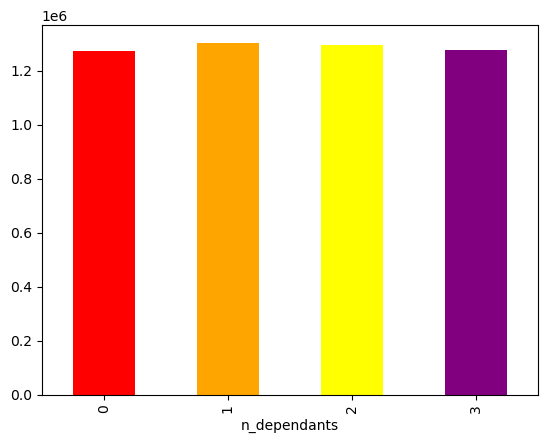

In [42]:
# Creating plot Chart of Age Groups
bar2 = df_filtered['n_dependants'].value_counts().sort_index().plot.bar(color = ['red','orange', 'yellow', 'purple'])


## Profiling based on orders_day_of_week

In [44]:
df_filtered['order_dow'].describe()

count    5.152533e+06
mean     2.750738e+00
std      2.087828e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: order_dow, dtype: float64

In [45]:
df_filtered['order_dow'].value_counts()

order_dow
0    974283
1    897968
6    716016
5    675397
2    669192
3    614872
4    604805
Name: count, dtype: int64

In [46]:
# Creating names for days of the week corresponding to the numbers
mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

df_filtered['order_dow'] = df_filtered['order_dow'].map(mapping)

Text(0, 0.5, 'Count')

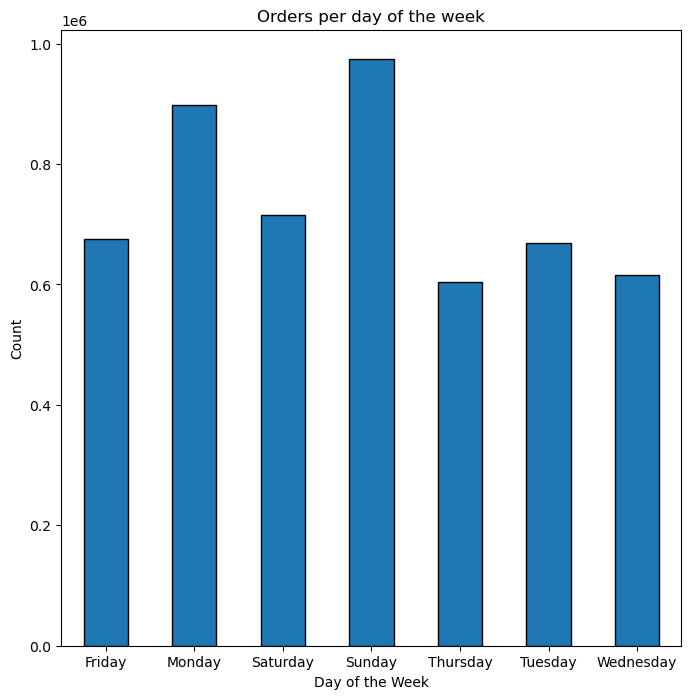

In [47]:
# Assuming `df_filtered` has the `order_dow` column
df_to_plot = df_filtered.copy()  # Create a copy to avoid modifying the original DataFrame

# Plot the bar chart using the correct DataFrame
plt.figure(figsize=(8, 8))
df_to_plot['order_dow'].value_counts().sort_index().plot.bar(edgecolor='black', rot=0)
plt.title('Orders per day of the week')  # Add title
plt.xlabel('Day of the Week')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label


### Profiling based on order_hour_of_day

In [49]:
df_filtered['order_hour_of_day'].describe

<bound method NDFrame.describe of 0           8
1           8
2           8
3           8
4           8
           ..
5152528    18
5152529    18
5152530    18
5152531    18
5152532    18
Name: order_hour_of_day, Length: 5152533, dtype: int64>

In [50]:
#For loop function 
hour_flag = []

for value in df_filtered["order_hour_of_day"]:
    if value < 8:
        hour_flag.append("Early morning")
    elif value > 8 and value < 12:
        hour_flag.append("Morning")
    elif value >= 12 and value < 16:
        hour_flag.append("Afternoon")
    elif value >= 16 and value < 20:
        hour_flag.append("Evening")
    elif value >= 20 and value < 22:
        hour_flag.append("Night")
    else:
        hour_flag.append("Late Night")

In [51]:
#Defining a new column
df_filtered['hour_flag']= hour_flag

In [52]:
df_filtered['hour_flag'].value_counts()

hour_flag
Afternoon        1692357
Morning          1265297
Evening          1191567
Late Night        438022
Night             283128
Early morning     282162
Name: count, dtype: int64

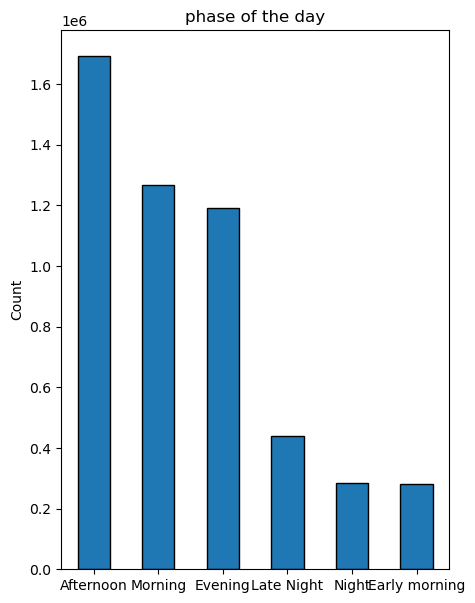

In [53]:
# Creating bar graph of hour Order Groups
hour_of_the_day = df_filtered['hour_flag'].value_counts()
plt.figure(figsize=(5,7))
hour_of_the_day = hour_of_the_day.plot.bar(edgecolor='black', rot=0)
plt.title('phase of the day')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()

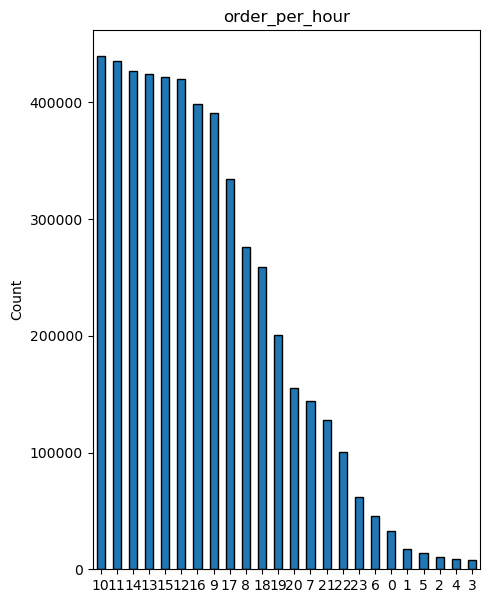

In [54]:
# Creating bar graph of hour Order Groups
per_hour= df_filtered['order_hour_of_day'].value_counts()
plt.figure(figsize=(5,7))
per_hour= per_hour.plot.bar(edgecolor='black', rot=0)
plt.title('order_per_hour')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout
plt.show()

### Profiling based on marital status

In [56]:
df_filtered['fam_status'].value_counts()

fam_status
married                             3611490
single                               831510
divorced/widowed                     443046
living with parents and siblings     266487
Name: count, dtype: int64

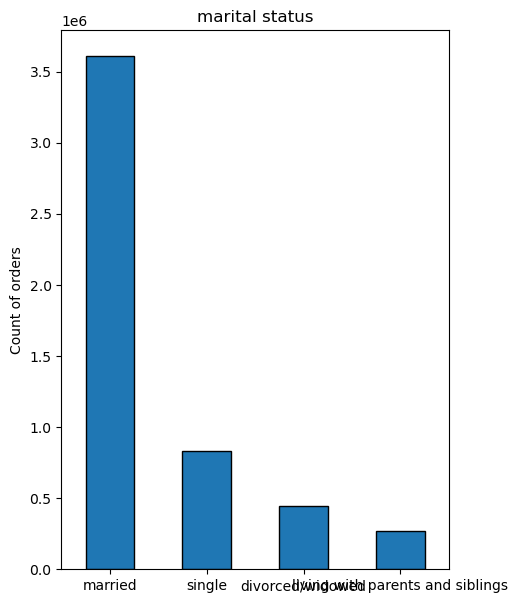

In [57]:
# Creating bar graph of hour Order Groups
marital_status= df_filtered['fam_status'].value_counts()
plt.figure(figsize=(5,7))
marital_status= marital_status.plot.bar(edgecolor='black', rot=0)
plt.title('marital status')
plt.xlabel('')
plt.ylabel('Count of orders')
plt.tight_layout
plt.show()

### Marital status vs. Age Group

In [59]:
crosstab = pd.crosstab(df_filtered['fam_status'], df_filtered['age_group'], dropna = False)

In [60]:
crosstab

age_group                           Adult  Middle-Age Adult   Senior  \
fam_status                                                             
divorced/widowed                        0            103542   339504   
living with parents and siblings        0                 0        0   
married                           1140392           1215236  1016400   
single                             385024            293927        0   

age_group                         Young Adult  
fam_status                                     
divorced/widowed                            0  
living with parents and siblings       266487  
married                                239462  
single                                 152559

NameError: name 'textwrap' is not defined

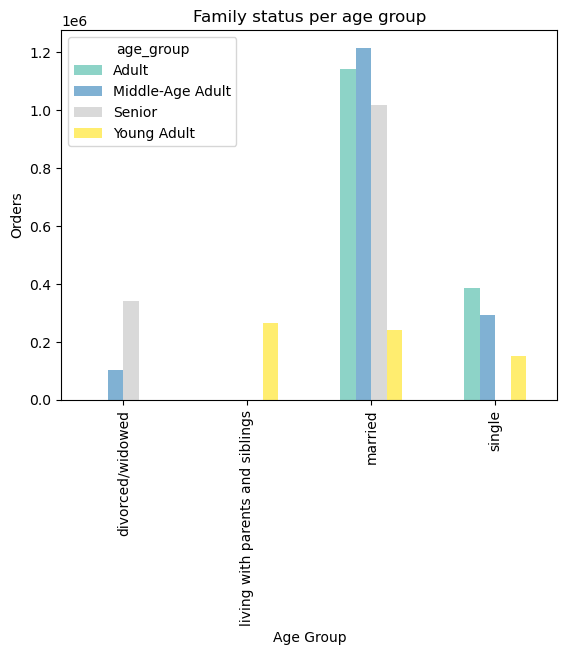

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import fill 

# Create the bar chart
fig, ax = plt.subplots()  # Create a figure and axes object
crosstab.plot.bar(ax=ax, colormap='Set3')  # Plot on the axes object

# Set plot title and labels
plt.title('Family status per age group')
plt.xlabel('Age Group')
plt.ylabel('Orders')

# Get current x-tick labels
labels = ax.get_xticklabels()

# Wrap labels
wrapped_labels = [textwrap.fill(label.get_text(), 10) for label in labels]  # Use textwrap.fill

# Set the wrapped labels (avoiding crosstab usage)
ax.set_xticklabels(wrapped_labels, rotation=0)

# Show the plot
plt.show()

# Aggregating the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [62]:
df_filtered.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'Unnamed: 0',
       'product_name', 'aisle_id', 'prices', 'source', 'price_range_loc',
       'Busiest day', 'Day Analysis', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price_per_userid', 'type_of_spender',
       'median_days_prior', 'Frequency_flag', 'First Name', 'Surname',
       'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'Region', 'Activity', 'age_group', 'Income_Flag',
       'hour_flag'],
      dtype='object')

In [63]:
# Creating aggregation subset of customer profile
cust_profile_agg=df_filtered.groupby(['user_id', 'Gender', 'STATE', 'n_dependants', 'fam_status', 'order_number', 'order_dow', 'order_hour_of_day', 'loyalty_flag', 'Frequency_flag', 'age_group', 'Income_Flag', 'Region', 'type_of_spender'])['prices'].sum().reset_index()

In [64]:
numeric_columns = cust_profile_agg.select_dtypes(include='number')

In [65]:
numeric_columns

user_id  n_dependants  order_number  order_hour_of_day  prices
0              1             3             1                  8     1.0
1              1             3             1                  8    18.1
2              1             3             1                  8    12.5
3              1             3             2                  7    21.1
4              1             3             2                  7     4.0
...          ...           ...           ...                ...     ...
1337553    32765             3            28                 20    35.4
1337554    32765             3            28                 20    19.4
1337555    32765             3            29                 18    19.5
1337556    32765             3            29                 18    14.9
1337557    32765             3            29                 18    12.1

[1337558 rows x 5 columns]

In [66]:
# Creating aggregation by dependent_category for order_number & prices
dependent_size_agg = cust_profile_agg.groupby('n_dependants').agg({'order_number':['max','min','mean'],'prices':['max','min','mean']})

In [67]:
dependent_size_agg

order_number                   prices                
                      max min       mean       max  min       mean
n_dependants                                                      
0                      99   1  17.408117  100168.2  0.0  42.489536
1                      99   1  17.285415  100070.6  0.0  43.203967
2                      99   1  17.119004  100102.0  0.0  43.082540
3                      99   1  17.360927  100082.7  0.0  39.888504

In [68]:
# Creating aggregation on other numeric data
agg_numeric_columns = numeric_columns.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'order_hour_of_day': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [69]:
agg_numeric_columns

order_number                order_hour_of_day                prices  \
                 max min       mean               max min       mean    max   
user_id                                                                       
1                 10   1   5.083333                16   7  10.125000   36.6   
2                 14   1   7.525000                15   9  10.550000  156.3   
3                 12   1   6.171429                19  14  16.457143   48.2   
4                  5   1   2.636364                15  11  12.636364   29.9   
5                  4   1   2.454545                18  12  15.818182   56.6   
...              ...  ..        ...               ...  ..        ...    ...   
32761              8   1   4.565217                16   9  12.347826   92.2   
32762              4   1   2.111111                14  10  10.666667   33.5   
32763             10   1   5.703704                23   8  16.296296   39.9   
32764             31   1  14.907407                22   5  14.722222   34.9   
32765             29   1  15.058824                23   0  14.529412   77.8   

                          
          min       mean  
user_id                   
1         1.0  15.654167  
2         2.0  36.640000  
3         1.4  20.611429  
4         1.5  13.427273  
5        11.6  30.909091  
...       ...        ...  
32761     4.8  33.313043  
32762     1.1  14.255556  
32763     1.3  15.829630  
32764     1.5  11.250000  
32765     1.1  28.063529  

[32765 rows x 9 columns]

In [70]:
# Creating aggregation by income_group for order_number & prices
income_group_agg = cust_profile_agg.groupby('Income_Flag').agg({'order_number':['max','min','mean'],'prices':['max','min','mean']})

In [71]:
income_group_agg

order_number                   prices                
                     max min       mean       max  min       mean
Income_Flag                                                      
High income           99   1  16.929436  100168.2  0.0  75.983372
low income            99   1  16.942628     454.6  0.0  26.203267
mid income            99   1  17.626184  100058.9  0.0  35.188310

# 07. Comparing customer profiles with regions

In [73]:
# Creating crosstab to compare age_group profile with region locations
age_region_comparison=pd.crosstab(df_filtered['age_group'],df_filtered['Region'],dropna=False)

In [74]:
age_region_comparison

Region            Midwest  Northeast   South    West
age_group                                           
Adult              373428     255612  516325  380051
Middle-Age Adult   363991     293416  535065  420233
Senior             316899     257310  441477  340218
Young Adult        149435     117981  230432  160660

<Figure size 1000x700 with 0 Axes>

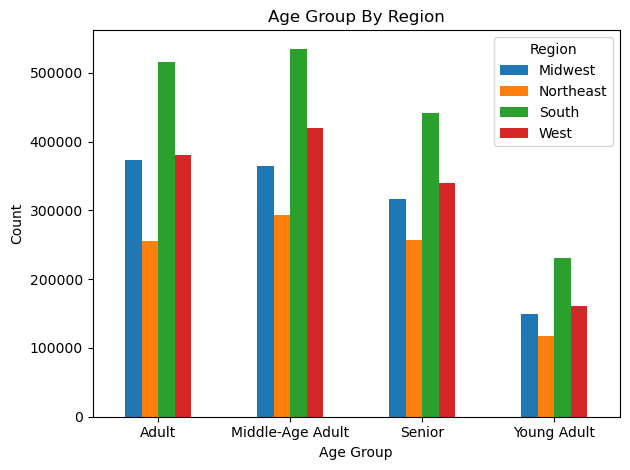

In [75]:
# Creating bar graph to show comparison between age_group and region
plt.figure(figsize=(10, 7))
age_region_comparison_bar= age_region_comparison.plot(kind='bar',rot=0)
plt.title('Age Group By Region')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [76]:
# Creating crosstab to compare age_group profile with region locations
fam_stats_region_comparison=pd.crosstab(df_filtered['fam_status'],df_filtered['Region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

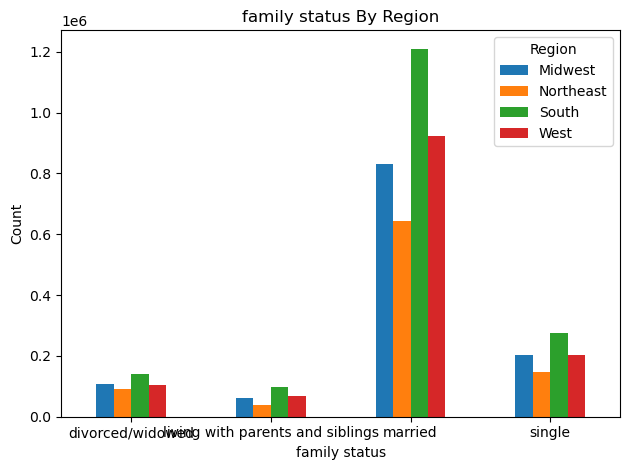

In [77]:
# Creating bar graph to show comparison between age_group and region
plt.figure(figsize=(10, 7))
fam_stats_region_comparison= fam_stats_region_comparison.plot(kind='bar',rot=0)
plt.title('family status By Region')
plt.xlabel('family status')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [78]:
# Creating crosstab to compare age_group with frequency_flag
age_customer_frequency_comparison = pd.crosstab(df_filtered['age_group'], df_filtered['Frequency_flag'])

In [79]:
age_customer_frequency_comparison

Frequency_flag    Frequent customer  High Spender  Regular customer
age_group                                                          
Adult                        578994        469801            476621
Middle-Age Adult             617393        492322            502990
Senior                       512482        418555            424867
Young Adult                  248590        204943            204975

<Figure size 1000x700 with 0 Axes>

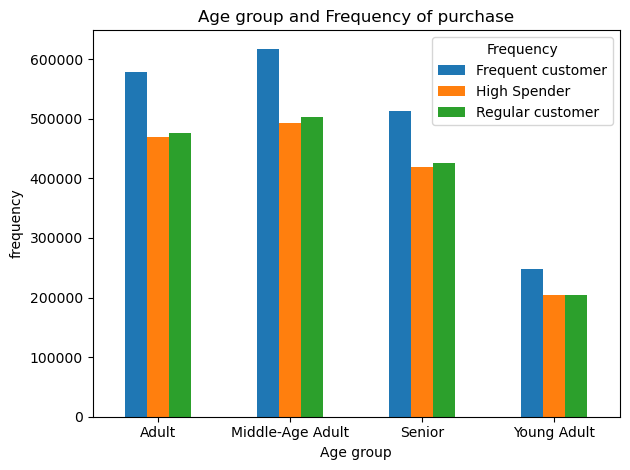

In [80]:
# Creating bar graph to show comparison between age_group and region
plt.figure(figsize=(10, 7))
age_customer_frequency_comparison= age_customer_frequency_comparison.plot(kind='bar',rot=0)
plt.title('Age group and Frequency of purchase')
plt.xlabel('Age group')
plt.ylabel('frequency')
plt.legend(title='Frequency')
plt.tight_layout()
plt.show()

In [81]:
# Creating crosstab Bewtween age_group and loyalty_flag
age_group_loyalty_comparison=pd.crosstab(df_filtered['age_group'],df_filtered['loyalty_flag'],dropna=False)

In [82]:
age_group_loyalty_comparison

loyalty_flag      Loyal customer  New customer  Regular customer
age_group                                                       
Adult                     481935        290900            752581
Middle-Age Adult          509613        314963            788129
Senior                    433409        263296            659199
Young Adult               228194        124069            306245

<Figure size 1000x700 with 0 Axes>

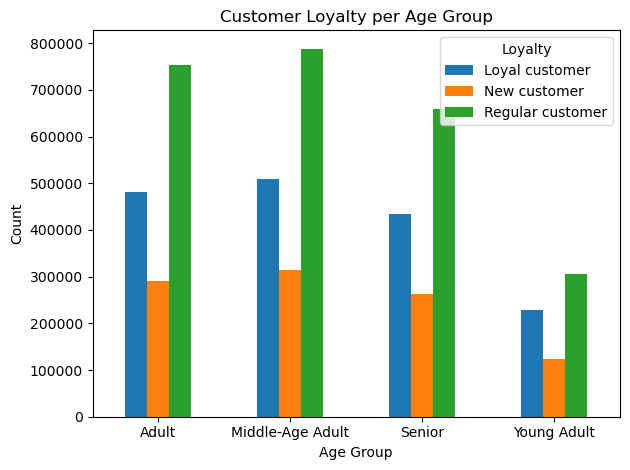

In [83]:
plt.figure(figsize=(10, 7))
age_group_loaylty_comparison_bar = age_group_loyalty_comparison.plot(kind='bar', rot=0)
plt.title('Customer Loyalty per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Loyalty')
plt.tight_layout()
plt.show()

In [84]:
# creating crosstab between type of spender and region
spender_region_comparison=pd.crosstab(df_filtered['type_of_spender'],df_filtered['Region'],dropna=False)

In [85]:
spender_region_comparison

Region           Midwest  Northeast    South     West
type_of_spender                                      
High Spender       29538      21073    39076    29536
low Spender      1174215     903246  1684223  1271626

<Figure size 1000x700 with 0 Axes>

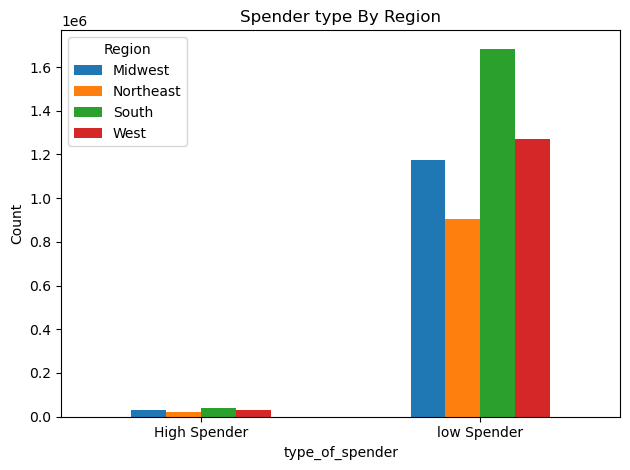

In [86]:
# Creating bar graph for income groups based on region
plt.figure(figsize=(10, 7))
spender_region_comparison_bar= spender_region_comparison.plot(kind='bar',rot=0)
plt.title('Spender type By Region')
plt.xlabel('type_of_spender')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [87]:
df_filtered.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'Unnamed: 0',
       'product_name', 'aisle_id', 'prices', 'source', 'price_range_loc',
       'Busiest day', 'Day Analysis', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price_per_userid', 'type_of_spender',
       'median_days_prior', 'Frequency_flag', 'First Name', 'Surname',
       'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'Region', 'Activity', 'age_group', 'Income_Flag',
       'hour_flag'],
      dtype='object')

In [88]:
# creating crosstab between income_group and region
income_region_comparison=pd.crosstab(df_filtered['Income_Flag'],df_filtered['Region'],dropna=False)

<Figure size 1000x700 with 0 Axes>

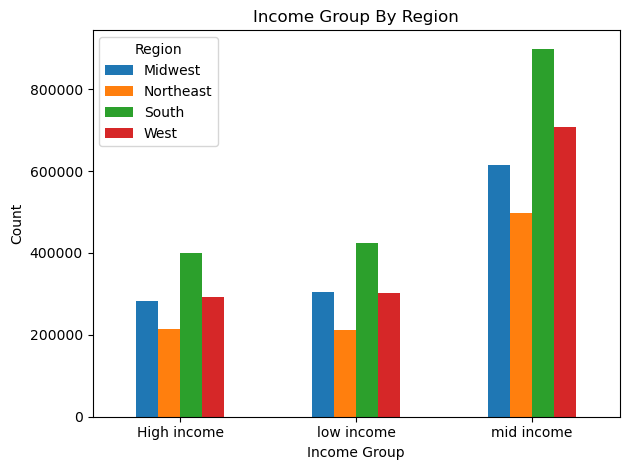

In [89]:
# Creating bar graph for income groups based on region
plt.figure(figsize=(10, 7))
income_region_comparison_bar= income_region_comparison.plot(kind='bar',rot=0)
plt.title('Income Group By Region')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [90]:
# Creating crosstab for customer frequency and region
region_customer_frequency_comparison = pd.crosstab(df_filtered['Region'], df_filtered['Frequency_flag'])

<Figure size 1000x700 with 0 Axes>

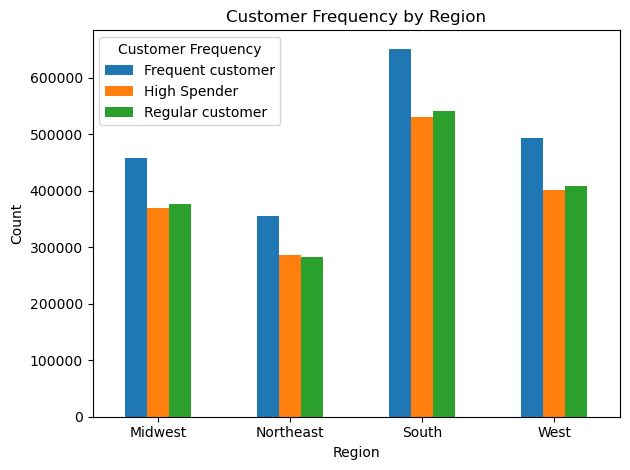

In [91]:
# Creating bar grap for customer frequency by region
plt.figure(figsize=(10, 7))
region_customer_frequency_comparison_bar= region_customer_frequency_comparison.plot(kind='bar',rot=0)
plt.title('Customer Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Customer Frequency')
plt.tight_layout()
plt.show()

In [92]:
# Creating crosstab to compare region with type of spender
region_spender_type_comparison = pd.crosstab(df_filtered['Region'], df_filtered['type_of_spender'], dropna=False)

<Figure size 1000x700 with 0 Axes>

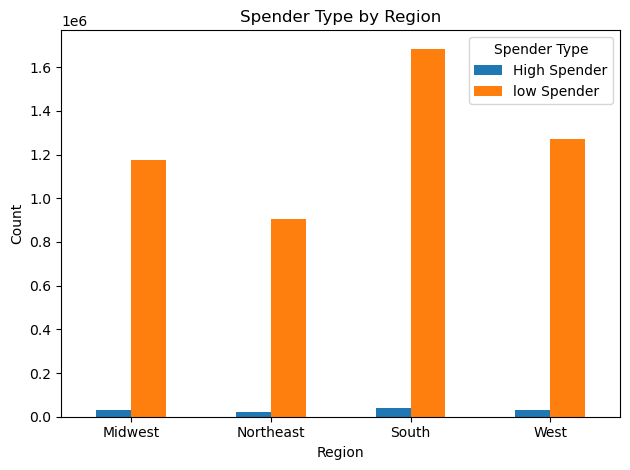

In [93]:
# Creating bar grap for type of spender by region
plt.figure(figsize=(10, 7))
region_spender_type_comparison_bar= region_spender_type_comparison.plot(kind='bar',rot=0)
plt.title('Spender Type by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Spender Type')
plt.tight_layout()
plt.show()

In [211]:
# Creating crosstab to compare age_group with fam_status
age_customer_family_comparison = pd.crosstab(df_filtered['age_group'], df_filtered['fam_status'])

<Figure size 1000x700 with 0 Axes>

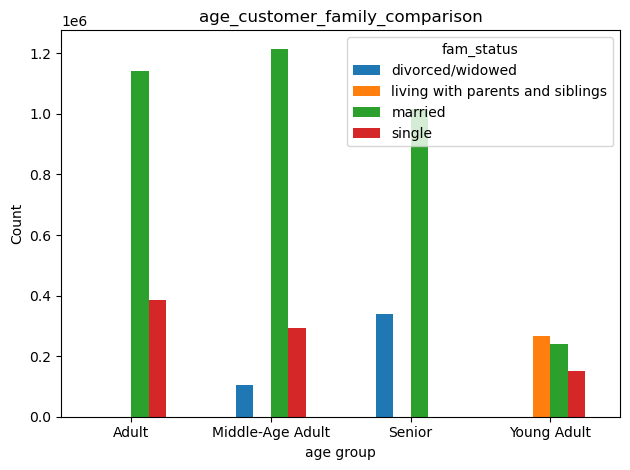

In [216]:
# Creating bar grap for type of spender by region
plt.figure(figsize=(10, 7))
age_customer_family_comparison_bar= age_customer_family_comparison.plot(kind='bar',rot=0)
plt.title('age_customer_family_comparison')
plt.xlabel('age group')
plt.ylabel('Count')
plt.legend(title='fam_status')
plt.tight_layout()
plt.show()

# 08. Comparing customer profiles with departments

In [95]:
#Importing department wrangled dataframe
df_prods_checked = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'products_checked.csv'), index_col=False)

In [96]:
df_prods_checked

Unnamed: 0  product_id  \
0               0           1   
1               1           2   
2               2           3   
3               3           4   
4               4           5   
...           ...         ...   
49667       49688       49684   
49668       49689       49685   
49669       49690       49686   
49670       49691       49687   
49671       49692       49688   

                                            product_name  aisle_id  \
0                             Chocolate Sandwich Cookies        61   
1                                       All-Seasons Salt       104   
2                   Robust Golden Unsweetened Oolong Tea        94   
3      Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4                              Green Chile Anytime Sauce         5   
...                                                  ...       ...   
49667          Vodka, Triple Distilled, Twist of Vanilla       124   
49668                 En Croute Roast Hazelnut Cranberry        42   
49669                                   Artisan Baguette       112   
49670         Smartblend Healthy Metabolism Dry Cat Food        41   
49671                             Fresh Foaming Cleanser        73   

       department_id  prices  
0                 19     5.8  
1                 13     9.3  
2                  7     4.5  
3                  1    10.5  
4                 13     4.3  
...              ...     ...  
49667              5     5.3  
49668              1     3.1  
49669              3     7.8  
49670              8     4.7  
49671             11    13.5  

[49672 rows x 6 columns]

In [97]:
df_filtered.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'Unnamed: 0',
       'product_name', 'aisle_id', 'prices', 'source', 'price_range_loc',
       'Busiest day', 'Day Analysis', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price_per_userid', 'type_of_spender',
       'median_days_prior', 'Frequency_flag', 'First Name', 'Surname',
       'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'Region', 'Activity', 'age_group', 'Income_Flag',
       'hour_flag'],
      dtype='object')

In [98]:
# Check if the column exists
if '_merge' in df_prods_checked.columns:
    # Rename the column to avoid conflict
    df_prods_checked = df_prods_checked.rename(columns={'_merge': 'merge_origin'})

# Merge with a specified indicator column name
df_final = df_filtered.merge(df_prods_checked, on='product_id', indicator='merge_origin')

In [99]:
df_final

order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1    Tuesday   
1         2539329        1    prior             1    Tuesday   
2         2539329        1    prior             1    Tuesday   
3         2539329        1    prior             1    Tuesday   
4         2539329        1    prior             1    Tuesday   
...           ...      ...      ...           ...        ...   
5148025   3114261    32765    prior            29  Wednesday   
5148026   3114261    32765    prior            29  Wednesday   
5148027   3114261    32765    prior            29  Wednesday   
5148028   3114261    32765    prior            29  Wednesday   
5148029   3114261    32765    prior            29  Wednesday   

         order_hour_of_day  days_since_prior_order  product_id  \
0                        8                     NaN         196   
1                        8                     NaN       14084   
2                        8                     NaN       12427   
3                        8                     NaN       26088   
4                        8                     NaN       26405   
...                    ...                     ...         ...   
5148025                 18                     3.0       26201   
5148026                 18                     3.0        7854   
5148027                 18                     3.0       31343   
5148028                 18                     3.0       23001   
5148029                 18                     3.0       18761   

         add_to_cart_order  reordered  ...                Activity  \
0                        1          0  ...  High Activity customer   
1                        2          0  ...  High Activity customer   
2                        3          0  ...  High Activity customer   
3                        4          0  ...  High Activity customer   
4                        5          0  ...  High Activity customer   
...                    ...        ...  ...                     ...   
5148025                  4          0  ...  High Activity customer   
5148026                  5          0  ...  High Activity customer   
5148027                  6          1  ...  High Activity customer   
5148028                  7          1  ...  High Activity customer   
5148029                  8          1  ...  High Activity customer   

                age_group  Income_Flag   hour_flag  Unnamed: 0_y  \
0                   Adult   low income  Late Night           195   
1                   Adult   low income  Late Night         14084   
2                   Adult   low income  Late Night         12427   
3                   Adult   low income  Late Night         26089   
4                   Adult   low income  Late Night         26406   
...                   ...          ...         ...           ...   
5148025  Middle-Age Adult  High income     Evening         26202   
5148026  Middle-Age Adult  High income     Evening          7854   
5148027  Middle-Age Adult  High income     Evening         31345   
5148028  Middle-Age Adult  High income     Evening         23002   
5148029  Middle-Age Adult  High income     Evening         18762   

                                  product_name_y aisle_id_y department_id  \
0                                           Soda         77             7   
1        Organic Unsweetened Vanilla Almond Milk         91            16   
2                            Original Beef Jerky         23            19   
3                     Aged White Cheddar Popcorn         23            19   
4               XL Pick-A-Size Paper Towel Rolls         54            17   
...                                          ...        ...           ...   
5148025                         Chicken Taquitos        129             1   
5148026                Freeze Dried Mango Slices        117            19   
5148027             Shredded Mild Cheddar Cheese         21            16   
5148028            

In [100]:
# Dropping merge column
df_final = df_final.drop(columns=['_merge'])

In [101]:
# Dropping merge column
df_final = df_final.drop(columns=['merge_origin'])

In [102]:
# Exporting new dataframe with product and dept merged to main dataframe
df_final.to_pickle(os.path.join(path,'02 Data','Prepared Data','final.pkl'))

In [103]:
df_final.columns


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_x', 'product_name_x',
       'aisle_id_x', 'prices_x', 'source', 'price_range_loc', 'Busiest day',
       'Day Analysis', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price_per_userid', 'type_of_spender', 'median_days_prior',
       'Frequency_flag', 'First Name', 'Surname', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'Region',
       'Activity', 'age_group', 'Income_Flag', 'hour_flag', 'Unnamed: 0_y',
       'product_name_y', 'aisle_id_y', 'department_id', 'prices_y'],
      dtype='object')

In [104]:
#Importing department wrangled dataframe
df_dept = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [105]:
df_dept

Unnamed: 0       department
0            1           frozen
1            2            other
2            3           bakery
3            4          produce
4            5          alcohol
5            6    international
6            7        beverages
7            8             pets
8            9  dry goods pasta
9           10             bulk
10          11    personal care
11          12     meat seafood
12          13           pantry
13          14        breakfast
14          15     canned goods
15          16       dairy eggs
16          17        household
17          18           babies
18          19           snacks
19          20             deli
20          21          missing

In [106]:
df_dept.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [107]:
df_final = df_final.merge(df_dept, on='department_id', indicator='merge_origin')

In [108]:
df_final.head()

order_id  user_id eval_set  order_number order_dow  order_hour_of_day  \
0   2539329        1    prior             1   Tuesday                  8   
1   2539329        1    prior             1   Tuesday                  8   
2   2539329        1    prior             1   Tuesday                  8   
3   2539329        1    prior             1   Tuesday                  8   
4   2539329        1    prior             1   Tuesday                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                     NaN         196                  1          0  ...   
1                     NaN       14084                  2          0  ...   
2                     NaN       12427                  3          0  ...   
3                     NaN       26088                  4          0  ...   
4                     NaN       26405                  5          0  ...   

   age_group Income_Flag   hour_flag  Unnamed: 0_y  \
0      Adult  low income  Late Night           195   
1      Adult  low income  Late Night         14084   
2      Adult  low income  Late Night         12427   
3      Adult  low income  Late Night         26089   
4      Adult  low income  Late Night         26406   

                            product_name_y aisle_id_y department_id prices_y  \
0                                     Soda         77             7      9.0   
1  Organic Unsweetened Vanilla Almond Milk         91            16     12.5   
2                      Original Beef Jerky         23            19      4.4   
3               Aged White Cheddar Popcorn         23            19      4.7   
4         XL Pick-A-Size Paper Towel Rolls         54            17      1.0   

   department  merge_origin  
0   beverages          both  
1  dairy eggs          both  
2      snacks          both  
3      snacks          both  
4   household          both  

[5 rows x 46 columns]

In [109]:
# Dropping merge column
df_final = df_final.drop(columns=['merge_origin'])

In [110]:
df_final.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'Unnamed: 0_x',
 'product_name_x',
 'aisle_id_x',
 'prices_x',
 'source',
 'price_range_loc',
 'Busiest day',
 'Day Analysis',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'avg_price_per_userid',
 'type_of_spender',
 'median_days_prior',
 'Frequency_flag',
 'First Name',
 'Surname',
 'Gender',
 'STATE',
 'Age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 'Region',
 'Activity',
 'age_group',
 'Income_Flag',
 'hour_flag',
 'Unnamed: 0_y',
 'product_name_y',
 'aisle_id_y',
 'department_id',
 'prices_y',
 'department']

In [111]:
# Dropping merge column
df_final = df_final.drop(columns=['aisle_id_y'])

In [112]:
# Dropping merge column
df_final = df_final.drop(columns=['prices_y'])

In [113]:
# Dropping merge column
df_final = df_final.drop(columns=['Unnamed: 0_y'])

In [114]:
# Dropping merge column
df_final = df_final.drop(columns=['product_name_y'])

In [115]:
# Dropping merge column
df_final = df_final.drop(columns=['Unnamed: 0_x'])

In [116]:
df_final.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name_x',
 'aisle_id_x',
 'prices_x',
 'source',
 'price_range_loc',
 'Busiest day',
 'Day Analysis',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'avg_price_per_userid',
 'type_of_spender',
 'median_days_prior',
 'Frequency_flag',
 'First Name',
 'Surname',
 'Gender',
 'STATE',
 'Age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 'Region',
 'Activity',
 'age_group',
 'Income_Flag',
 'hour_flag',
 'department_id',
 'department']

In [117]:
# Exporting new dataframe with product and dept merged to main dataframe
df_final.to_pickle(os.path.join(path,'02 Data','Prepared Data','final.pkl'))

In [118]:
df_final.shape

(5148030, 40)

In [119]:
df_final['department'].value_counts()

department
produce            1508417
dairy eggs          854450
snacks              462986
beverages           427190
frozen              350912
pantry              297579
bakery              187185
canned goods        170564
deli                168998
dry goods pasta     136654
household           119223
breakfast           111257
meat seafood        111024
personal care        71895
babies               65454
international        42945
alcohol              23412
pets                 15804
missing              10632
other                 5829
bulk                  5620
Name: count, dtype: int64

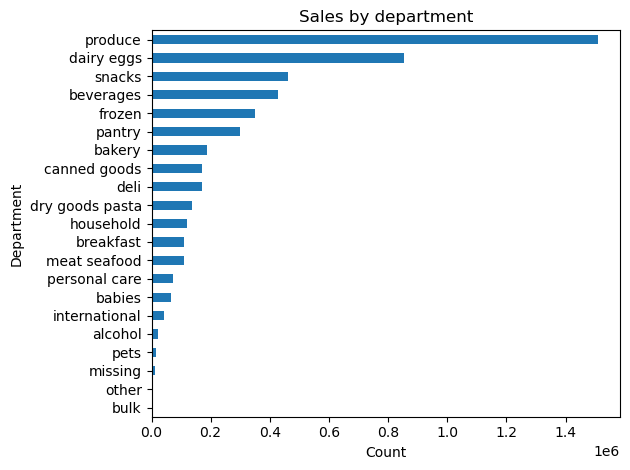

In [120]:
# Creating department bar graph
dept_bar = df_final['department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Sales by department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

In [121]:
# Creating crosstab to compare age_group with departments
age_department_comparison=pd.crosstab(df_final['age_group'],df_final['department'],dropna=False)

<Figure size 2500x2500 with 0 Axes>

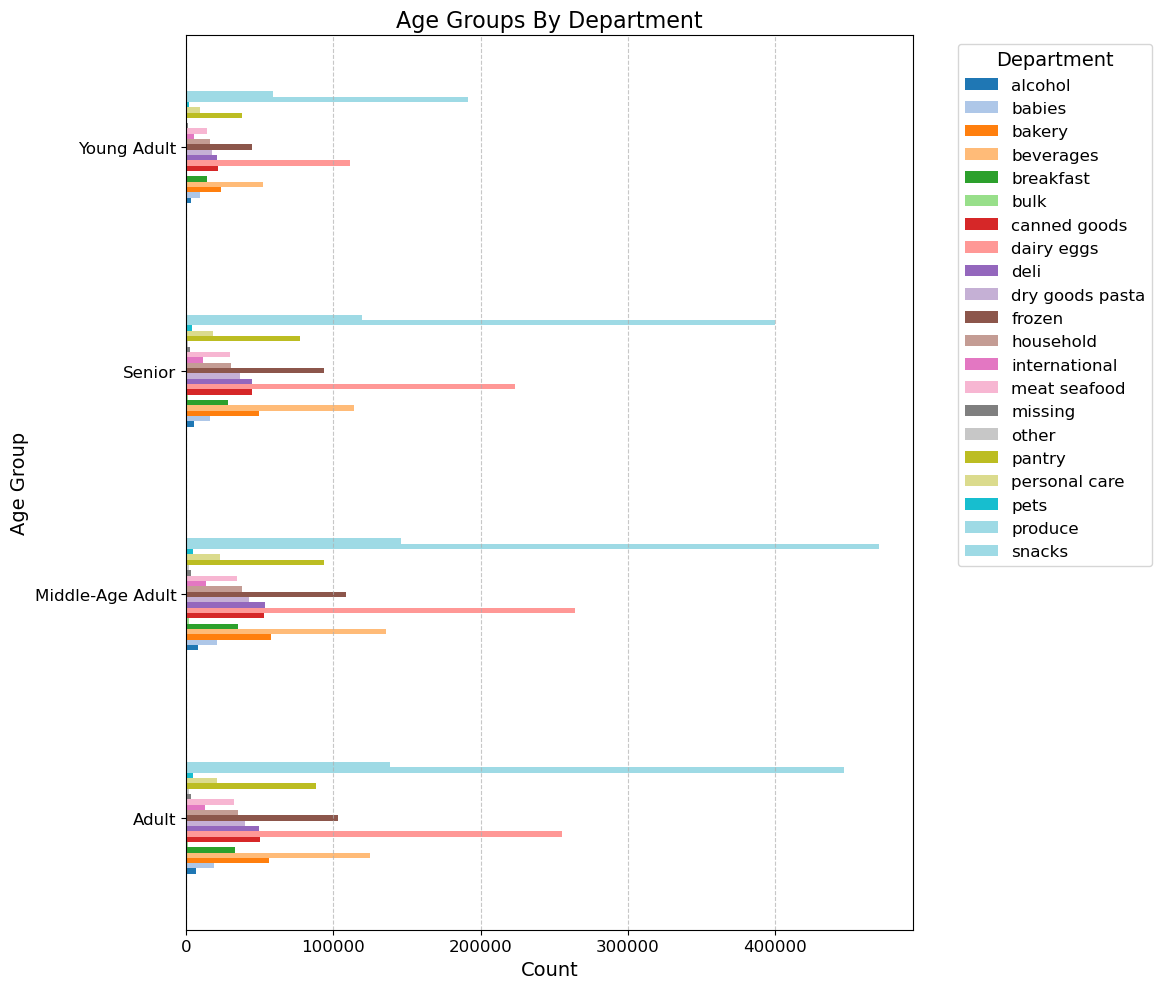

In [122]:
plt.figure(figsize=(25, 25))
age_department_comparison_bar = age_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='tab20', rot=0)

# Add title and labels with larger font size
plt.title('Age Groups By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add gridlines
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [123]:
# Creating crosstab to compare regions with departments
region_dept_comparison = pd.crosstab(df_final['Region'], df_final['department'], dropna = False)

In [124]:
region_dept_comparison

department  alcohol  babies  bakery  beverages  breakfast  bulk  canned goods  \
Region                                                                          
Midwest        5492   14462   43695     100159      26689  1440         39265   
Northeast      3525   13382   34870      77908      20239   858         30898   
South          7814   22500   61704     143070      36717  1790         56523   
West           6581   15110   46916     106053      27612  1532         43878   

department  dairy eggs   deli  dry goods pasta  ...  household  international  \
Region                                          ...                             
Midwest         198347  38645            31839  ...      29538          10115   
Northeast       153549  31219            24756  ...      21073           7289   
South           288307  56631            44982  ...      39076          14505   
West            214247  42503            35077  ...      29536          11036   

department  meat seafood  missing  other  pantry  personal care  pets  \
Region                                                                  
Midwest            25386     2429   1371   69642          17181  3907   
Northeast          20569     1839   1094   52382          12656  3299   
South              36617     3719   1930   99875          23872  4406   
West               28452     2645   1434   75680          18186  4192   

department  produce  snacks  
Region                       
Midwest      352793  109203  
Northeast    265775   83869  
South        507910  151978  
West         381939  117936  

[4 rows x 21 columns]

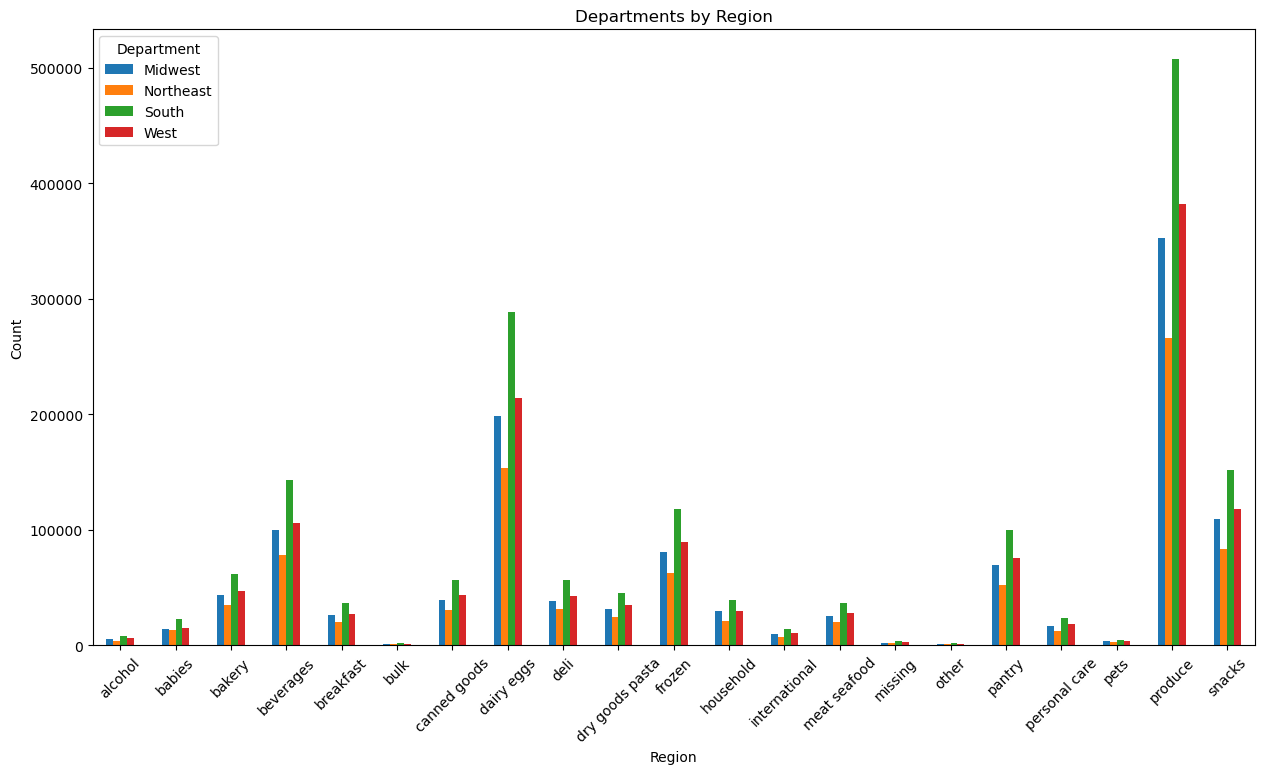

In [125]:
df_transposed = region_dept_comparison.T
df_transposed.plot(kind='bar', figsize=(15, 8))
plt.title('Departments by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Department')
plt.show()

# Further Analysis

In [204]:
df_final['price_range_loc'].value_counts()

price_range_loc
Mid-range product     3472858
Low-range product     1610139
High-range product      65033
Name: count, dtype: int64

In [127]:
df_final.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name_x',
 'aisle_id_x',
 'prices_x',
 'source',
 'price_range_loc',
 'Busiest day',
 'Day Analysis',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'avg_price_per_userid',
 'type_of_spender',
 'median_days_prior',
 'Frequency_flag',
 'First Name',
 'Surname',
 'Gender',
 'STATE',
 'Age',
 'date_joined',
 'n_dependants',
 'fam_status',
 'income',
 'Region',
 'Activity',
 'age_group',
 'Income_Flag',
 'hour_flag',
 'department_id',
 'department']

In [128]:
df_final['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    2504102
Loyal customer      1651575
New customer         992353
Name: count, dtype: int64

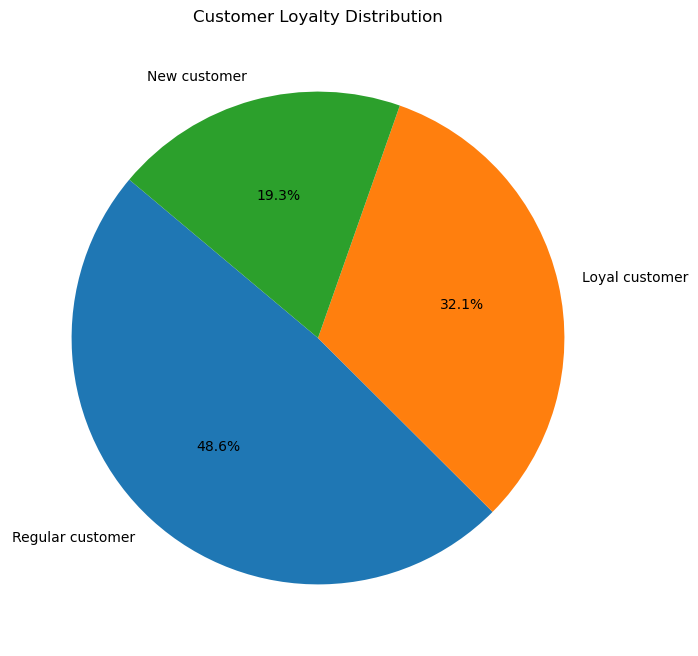

In [129]:
loyalty_counts = df_final['loyalty_flag'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Customer Loyalty Distribution')

# Display the chart
plt.show()

In [130]:
df_final

order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1    Tuesday   
1         2539329        1    prior             1    Tuesday   
2         2539329        1    prior             1    Tuesday   
3         2539329        1    prior             1    Tuesday   
4         2539329        1    prior             1    Tuesday   
...           ...      ...      ...           ...        ...   
5148025   3114261    32765    prior            29  Wednesday   
5148026   3114261    32765    prior            29  Wednesday   
5148027   3114261    32765    prior            29  Wednesday   
5148028   3114261    32765    prior            29  Wednesday   
5148029   3114261    32765    prior            29  Wednesday   

         order_hour_of_day  days_since_prior_order  product_id  \
0                        8                     NaN         196   
1                        8                     NaN       14084   
2                        8                     NaN       12427   
3                        8                     NaN       26088   
4                        8                     NaN       26405   
...                    ...                     ...         ...   
5148025                 18                     3.0       26201   
5148026                 18                     3.0        7854   
5148027                 18                     3.0       31343   
5148028                 18                     3.0       23001   
5148029                 18                     3.0       18761   

         add_to_cart_order  reordered  ... n_dependants  fam_status  income  \
0                        1          0  ...            3     married   40423   
1                        2          0  ...            3     married   40423   
2                        3          0  ...            3     married   40423   
3                        4          0  ...            3     married   40423   
4                        5          0  ...            3     married   40423   
...                    ...        ...  ...          ...         ...     ...   
5148025                  4          0  ...            3     married  135419   
5148026                  5          0  ...            3     married  135419   
5148027                  6          1  ...            3     married  135419   
5148028                  7          1  ...            3     married  135419   
5148029                  8          1  ...            3     married  135419   

        Region                Activity         age_group  Income_Flag  \
0        South  High Activity customer             Adult   low income   
1        South  High Activity customer             Adult   low income   
2        South  High Activity customer             Adult   low income   
3        South  High Activity customer             Adult   low income   
4        South  High Activity customer             Adult   low income   
...        ...                     ...               ...          ...   
5148025   West  High Activity customer  Middle-Age Adult  High income   
5148026   West  High Activity customer  Middle-Age Adult  High income   
5148027   West  High Activity customer  Middle-Age Adult  High income   
5148028   West  High Activity customer  Middle-Age Adult  High income   
5148029   West  High Activity customer  Middle-Age Adult  High income   

          hour_flag  department_id     department  
0        Late Night              7      beverages  
1        Late Night             16     dairy eggs  
2        Late Night             19         snacks  
3        Late Night             19         snacks  
4        Late Night             17      household  
...             ...            ...            ...  
5148025     Evening              1         frozen  
5148026     Evening             19         snacks  
5148027     Evening             16     dairy eggs  
5148028     Evening              6  international  
5148029     Evening             13         pantry

In [131]:
df_final.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name_x', 'aisle_id_x',
       'prices_x', 'source', 'price_range_loc', 'Busiest day', 'Day Analysis',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price_per_userid', 'type_of_spender', 'median_days_prior',
       'Frequency_flag', 'First Name', 'Surname', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'Region',
       'Activity', 'age_group', 'Income_Flag', 'hour_flag', 'department_id',
       'department'],
      dtype='object')

In [132]:
df_final[['Busiest day','Day Analysis','busiest_period_of_day']]

Busiest day    Day Analysis busiest_period_of_day
0        Regularly busy  Regularly busy        Average orders
1        Regularly busy  Regularly busy        Average orders
2        Regularly busy  Regularly busy        Average orders
3        Regularly busy  Regularly busy        Average orders
4        Regularly busy  Regularly busy        Average orders
...                 ...             ...                   ...
5148025  Regularly busy   Slowest day 1        Average orders
5148026  Regularly busy   Slowest day 1        Average orders
5148027  Regularly busy   Slowest day 1        Average orders
5148028  Regularly busy   Slowest day 1        Average orders
5148029  Regularly busy   Slowest day 1        Average orders

[5148030 rows x 3 columns]